In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits

from raytracerthing import RayTracerThing, Activations

%matplotlib inline

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits['images']
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

1797 (8, 8)


In [4]:
y = digits['target']

print(y[:5])

[0 1 2 3 4]


In [5]:
%%time 

detector_shape = (10, 1)
layer_shape = (10, 8)

clf = RayTracerThing(input_shape=image_shape, output_shape=detector_shape, 
                     hidden_layer_shape=layer_shape, n_layers=3,
                     activation_func=Activations.softmax)

CPU times: user 130 ms, sys: 16.7 ms, total: 147 ms
Wall time: 132 ms


In [6]:
%%time 

outputs = [clf.forward(image) for image in X[:10]]    

CPU times: user 495 ms, sys: 0 ns, total: 495 ms
Wall time: 495 ms


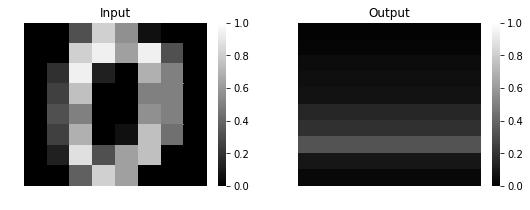

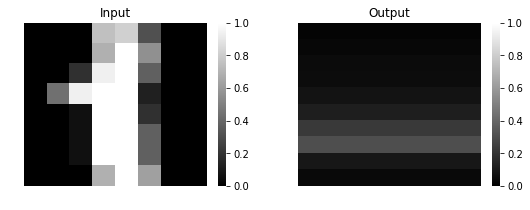

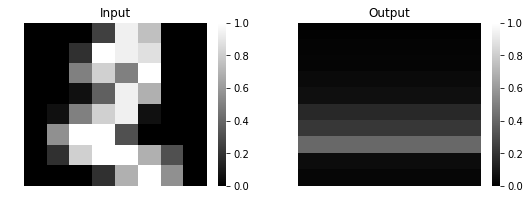

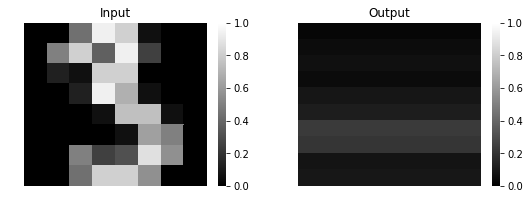

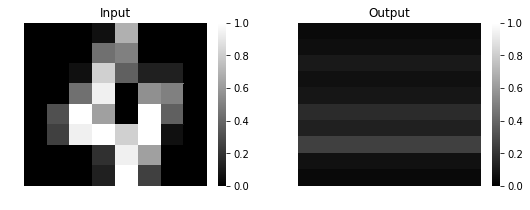

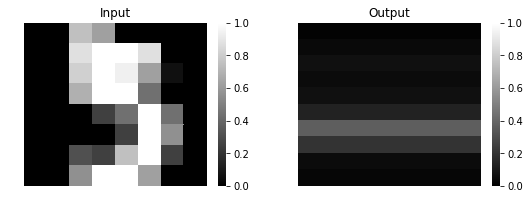

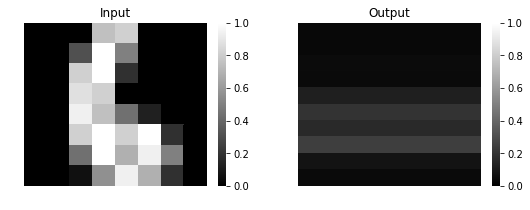

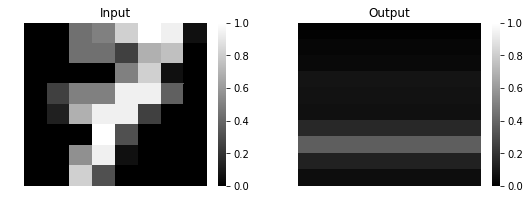

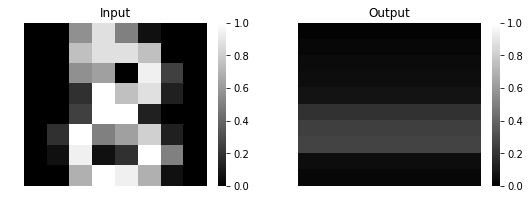

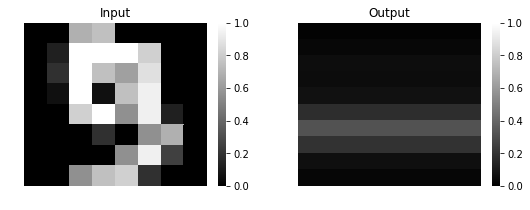

In [7]:
for image, output in zip(X[:10], outputs[:10]):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    
    ax = axes[0]    
    ax = sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Input')
    
    ax = axes[1]    
    ax = sns.heatmap(output, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Output')